In [15]:
# This script is designed to obtain accuracy of callers for each dataset D1-D6, as well as overall accuracy

# PROGRESS:
# D1: done
# D2: done
# D3: done
# D4: done
# D5: done
# D6: done

# SETUP - run only once

In [1]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2


#from google.colab import drive
#drive.mount('/content/gdrive')

caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

# Determining accuracy - run once per caller

# Functions

## D1

In [2]:
def d1_accuracy(caller_name):
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
  # D1 Accuracy

  dir_1 =  root1+"1_gs.csv"
  dir_2 =  root2+'_d1.csv'
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


  numsamples += len(gold_set)


  # 4 digit resolution
  hit = 0
  #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
  for i in range(0,len(gold_set)):
    try:
      if gold_set[i] == pred_set[i]:
        hit +=1 
      elif pred_set[i] == gold_set[i-1]:
        hit += 1
      elif pred_set[i] == gold_set[i+1]:
        hit += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
  #print(hit,len(gold_set))
  four_dig=hit*100/len(gold_set)
  fourdig = fourdig + hit

  # 2 digit resolution
  hit = 0
  for i in range(0,len(gold_set)):
    if gold_set[i][0:4] == pred_set[i][0:4]:
      hit +=1 
    elif pred_set[i][0:4] == gold_set[i-1][0:4]:
      hit += 1
    elif pred_set[i][0:4] == gold_set[i+1][0:4]:
      hit += 1

  #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
  #print(hit,len(gold_set))
  two_dig = hit*100/len(gold_set)
  twodig = twodig + hit
  return caller_name,four_dig,two_dig,numsamples,twodig,fourdig



## D2

### Class 1

In [3]:
def d2_class1_accuracy(caller_name):
  # Run for D2 accuracy 4 dig res
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  numsamples += len(gold_set)
  # 4 digit resolution
  hit4 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(gold_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:7] for elem in allele_list_next)

        #print(allele_list_curr)

        if pred_set[i] in allele_list_curr:
          hit4 +=1 
        elif pred_set[i] in allele_list_prev:
          hit4 += 1
        elif pred_set[i] in allele_list_next:
          hit4 += 1
      else:
        if gold_set[i][0:7] == pred_set[i]:
          hit4 +=1 
        elif pred_set[i] == gold_set[i-1][0:7]:
          hit4 += 1
        elif pred_set[i] == gold_set[i+1][0:7]:
          hit4 += 1
    except:
      pass

  #print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
  #print(hit4,len(pred_set))
  four_dig=hit4*100/len(gold_set)
  fourdig = fourdig + hit4

    # Run for D2 accuracy 2 dig res


  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:4])

    for k in range(0,6):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])

  #numsamples += len(gold_set)
  # 2 digit resolution
  hit2 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(pred_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:4] for elem in allele_list_next)

        if pred_set[i][0:4] in allele_list_curr:
          hit2 +=1 
        elif pred_set[i][0:4] in allele_list_prev:
          hit2 += 1
        elif pred_set[i][0:4] in allele_list_next:
          hit2 += 1
      else:
        if gold_set[i][0:4] == pred_set[i][0:4]:
          hit2 +=1 
        elif pred_set[i][0:4] == gold_set[i-1][0:4]:
          hit2 += 1
        elif pred_set[i][0:4] == gold_set[i+1][0:4]:
          hit2 += 1
    except:
      pass

  #print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
  #print(hit2,len(gold_set))
  twodig = twodig + hit2
  two_dig=hit2*100/len(gold_set)
  return caller_name,four_dig,two_dig,numsamples,twodig,fourdig




### Class II

In [4]:
def d2_class2_accuracy(caller_name):
  root1 = '../datasets/'
  root2 = '../results/standard/{}'.format(caller_name)
  fourdig = 0
  twodig = 0
  numsamples = 0
      
  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)
  #if pre.columns.str.contains('DQB1').any():
  # col_selector='DRB1|DQB1'
  #else:
  # col_selector='DRB1'
  gs=gs.set_index(gs.columns[0])
  if caller_name == 'rna2hla':
    mask = gs.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
          
  else:
    mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                    axis=0)
  gs=gs.loc[: , mask]
  gs=gs.reset_index()
  gs=gs.fillna('DRB1*00:00')


  pre=pre.set_index(pre.columns[0])
  if caller_name == 'rna2hla':
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                  axis=0)
  else:
    mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  pre=pre.loc[: , mask]
  pre=pre.reset_index()
  pre=pre.fillna('DRB1*00:00')

  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:10])

    if len(g) != len(p):
      for k in range(0,len(g)):
        gold_set.append(g[k])
      for k in range(0,len(p)):
        pred_set.append(p[k])

    else:  
      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


  numsamples += len(gold_set)
  # 4 digit resolution
  hit4 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(gold_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:10] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:10] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:10] for elem in allele_list_next)

        #print(allele_list_curr)

        if pred_set[i] in allele_list_curr:
          #print(pred_set[i],allele_list_curr)
          hit4 +=1 
        elif pred_set[i] in allele_list_prev:
          #print(pred_set[i],allele_list_prev)
          hit4 += 1
        elif pred_set[i] in allele_list_next:
          #print(pred_set[i],allele_list_next)
          hit4 += 1
      else:
        if gold_set[i][0:10] == pred_set[i]:
          #print(pred_set[i],gold_set[i][0:10])
          hit4 +=1 
        elif pred_set[i] == gold_set[i-1][0:10]:
          #print(pred_set[i],gold_set[i-1][0:10])
          hit4 += 1
        elif pred_set[i] == gold_set[i+1][0:10]:
          #print(pred_set[i],gold_set[i+1][0:10])
          hit4 += 1
      #print(pred_set[i],gold_set[i][0:10])
    except:
      pass

  #print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
  #print(hit4,len(pred_set))
  fourdig = fourdig + hit4
  four_dig=hit4*100/len(gold_set)
  # Run for D2 accuracy 2 dig res


  dir_1 =  root1+"2_gs.csv"
  dir_2 =  root2+"_d2.csv"
  gs = pd.read_csv(dir_1)
  pre = pd.read_csv(dir_2)
  #if pre.columns.str.contains('DQB1').any():
  # col_selector='DRB1|DQB1'
  ## col_selector='DRB1'

  gs=gs.set_index(gs.columns[0])
  if caller_name == 'rna2hla':
    mask = gs.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
        
  else:
    mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  gs=gs.loc[: , mask]
  gs=gs.reset_index()
  gs=gs.fillna('DRB1*00:00')
  pre=pre.set_index(pre.columns[0])
  if caller_name == 'rna2hla':
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                  axis=0)
  else:
    mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                  axis=0)
  pre=pre.loc[: , mask]
  pre=pre.reset_index()
  pre=pre.fillna('DRB1*00:00')
  # Put in dictionary with key pointing to 6 values
  index_list = list()

  gs_accessions = gs[gs.columns[0]].to_list()
  pre_accessions = pre[pre.columns[0]].to_list()

  for i in gs_accessions:
    try: index_list.append( pre_accessions.index(i) )
    except: pass
  #index list holds the order the prediction samples are in, relative to GS
  #print(len(index_list))

  # constructing standardized, stripped list of all alleles 
  goldstandard = gs.values
  prediction = pre.values

  gold_set = []
  pred_set = []

  for i in range(0,len(goldstandard)):
    try:
      g = goldstandard[i][1:7]
      p_raw = prediction[index_list[i]][1:7]
      p = list()
    except: 
      pass
    
    for i in p_raw:
      p.append(i[0:7])

    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


  #numsamples += len(gold_set)
  # 2 digit resolution
  hit2 = 0
  #TODO: fix error where GS[2] matching with PRE[3] should not work

  for i in range(0,len(pred_set)): 
    try:
      if '/' in gold_set[i]:
        allele_list_curr = gold_set[i].split('/')
        allele_list_prev = gold_set[i-1].split('/')
        allele_list_next = gold_set[i+1].split('/')

        allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
        allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
        allele_list_next[:] = (elem[:7] for elem in allele_list_next)

        if pred_set[i][0:7] in allele_list_curr:
          hit2 +=1 
        elif pred_set[i][0:7] in allele_list_prev:
          hit2 += 1
        elif pred_set[i][0:7] in allele_list_next:
          hit2 += 1
      else:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit2 +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit2 += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit2 += 1
    except:
      pass

  #print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
  #print(hit2,len(gold_set))
  twodig = twodig + hit2
  two_dig=hit2*100/len(pred_set)
  return caller_name,four_dig,two_dig,numsamples,twodig,fourdig


In [6]:
d2_class2_accuracy('phlat')

('phlat', 74.6938775510204, 83.92857142857143, 1960, 1645, 1464)

## D3

In [5]:
def d3_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # D3 Accuracy

    dir_1 =  root1+"3_gs.csv"
    dir_2 =  root2+"_d3.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    pre=pre.fillna('DRB1*00:00')
    #pre=pre.dropna()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions = pre[pre.columns[0]].to_list()

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = []
    pred_set = []

    for i in range(0,len(goldstandard)):
      try:
        g = goldstandard[i][1:7]
        p_raw = prediction[index_list[i]][1:7]
        p = list()
      except: 
        pass
      
      for i in p_raw:
        p.append(i[0:10])

      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


    numsamples += len(gold_set)


    # 4 digit resolution
    hit = 0
    #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i] == pred_set[i]:
          hit +=1 
        elif pred_set[i] == gold_set[i-1]:
          hit += 1
        elif pred_set[i] == gold_set[i+1]:
          hit += 1
      except:
        pass

    #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
    #print(hit,len(gold_set))
    fourdig = fourdig + hit
    four_dig=hit*100/len(gold_set)

    # 2 digit resolution
    hit = 0
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit += 1
      except:
        pass
      
    #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
    #print(hit,len(gold_set))
    two_dig = hit*100/len(gold_set)
    twodig = twodig + hit
    return caller_name,four_dig,two_dig,numsamples,twodig,fourdig



## D4

In [7]:
def d4_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # D4 Accuracy DRB1 Only

    dir_1 =  root1+"4_gs.csv"
    dir_2 =  root2+"_d4.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    pre=pre.fillna('DRB1*00:00')
    #pre=pre.dropna()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions = pre[pre.columns[0]].to_list()

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = []
    pred_set = []

    for i in range(0,len(goldstandard)):
      try:
        g = goldstandard[i][1:7]
        p_raw = prediction[index_list[i]][1:7]
        p = list()
      except: 
        pass
      
      for i in p_raw:
        p.append(i[0:10])

      for k in range(0,len(g)):
        gold_set.append(g[k]) # all alleles for the accession number
        pred_set.append(p[k])


    numsamples += len(gold_set)


    # 4 digit resolution
    hit = 0
    #fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i] == pred_set[i]:
          hit +=1 
        elif pred_set[i] == gold_set[i-1]:
          hit += 1
        elif pred_set[i] == gold_set[i+1]:
          hit += 1
      except:
        pass

    #print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
    #print(hit,len(gold_set))
    fourdig = fourdig + hit
    four_dig=hit*100/len(gold_set)

    # 2 digit resolution
    hit = 0
    for i in range(0,len(gold_set)):
      try:
        if gold_set[i][0:7] == pred_set[i][0:7]:
          hit +=1 
        elif pred_set[i][0:7] == gold_set[i-1][0:7]:
          hit += 1
        elif pred_set[i][0:7] == gold_set[i+1][0:7]:
          hit += 1
      except:
        pass
      
    #print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
    #print(hit,len(gold_set))
    two_dig = hit*100/len(gold_set)
    twodig = twodig + hit
    return caller_name,four_dig,two_dig,numsamples,twodig,fourdig




## D5

In [8]:
def d5_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # Run for d5 accuracy: monoallelic A and B only 
    # i just brute force this for now because there are only 4 samples 

    dir_1 =  root1+"5_gs.csv"
    dir_2 =  root2+"_d5.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()

    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions_raw = pre[pre.columns[0]].to_list()
    pre_accessions = list()
    for i in pre_accessions_raw:
      pre_accessions.append(i[0:10])

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    numsamples += len(index_list)

    # constructing standardized, stripped list of all alleles 
    prediction = pre.values
    pred_set = []

    for i in range(0,len(index_list)):
      p_raw = prediction[index_list[i]][1:5]
      for i in p_raw:
        try: pred_set.append(i[0:7])
        except: pred_set.append('Z*00:00')


    #sample 1
    if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
      fourdig_hit +=1 
    if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
      twodig_hit +=1 

    #sample 2
    if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
      fourdig_hit += 1
    if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
      twodig_hit += 1

    #sample 3
    if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
      fourdig_hit += 1
    if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
      twodig_hit += 1

    #sample 4
    if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
      fourdig_hit += 1
    if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
      twodig_hit += 1
          

    #print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
    #print(fourdig_hit,4)
    fourdig = fourdig + fourdig_hit
    four_dig=fourdig_hit*100/4

    #print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
    #print(twodig_hit,4)
    two_dig = twodig_hit*100/4
    twodig = twodig + twodig_hit
    return caller_name,four_dig,two_dig,numsamples,twodig,fourdig


## D6

In [9]:
def d6_accuracy(caller_name):
    root1 = '../datasets/'
    root2 = '../results/standard/{}'.format(caller_name)
    fourdig = 0
    twodig = 0
    numsamples = 0
    # run for d6 accuracy: monoallelic C only

    dir_1 =  root1+"6_gs.csv"
    dir_2 =  root2+"_d6.csv"
    gs = pd.read_csv(dir_1)
    pre = pd.read_csv(dir_2)
    pre=pre.set_index(pre.columns[0])
    mask = pre.apply(lambda col: col.str.contains('C').any(),
                    axis=0)
    pre=pre.loc[: , mask]
    pre=pre.reset_index()
    twodig_hit = 0
    fourdig_hit = 0

    # Put in dictionary with key pointing to 6 values
    index_list = list()

    gs_accessions = gs[gs.columns[0]].to_list()
    pre_accessions_raw = pre[pre.columns[0]].to_list()
    pre_accessions = list()
    for i in pre_accessions_raw:
      pre_accessions.append(i[0:10])

    for i in gs_accessions:
      try: index_list.append( pre_accessions.index(i) )
      except: pass

    numsamples += len(index_list)

    # constructing standardized, stripped list of all alleles 
    goldstandard = gs.values
    prediction = pre.values

    gold_set = gs[gs.columns[1]].to_list();
    pred_set = []

    for i in range(0,len(index_list)):
      p_raw = prediction[index_list[i]][1:3] #select C alleles only
      for i in p_raw:
        try: pred_set.append(i[0:7])
        except: pred_set.append('Z*00:00')



    for i in range(8):
      if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
        fourdig_hit +=1 
      if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
        twodig_hit +=1 

    #print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
    #print(fourdig_hit,8)
    four_dig=fourdig_hit*100/len(gold_set)
    fourdig = fourdig + fourdig_hit

    #print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
    two_dig = twodig_hit*100/len(gold_set)
    #print(twodig_hit,8)
    twodig = twodig + twodig_hit
    return caller_name,four_dig,two_dig,numsamples,twodig,fourdig


# New Way

## D1

In [15]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d1_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df1=pd.DataFrame(scores,columns=col_names)
df1['Dataset'] ='D1'
df1['Class'] ='Class 1'
df1


,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,68.333333,97.666667,300,293,205,D1,Class 1
1,hlaforest,85.666667,96.666667,300,290,257,D1,Class 1
2,hlavbseq,88.666667,97.666667,300,293,266,D1,Class 1
3,optitype,94.666667,97.333333,300,292,284,D1,Class 1
4,phlat,83.666667,95.666667,300,287,251,D1,Class 1
5,rna2hla,92.333333,97.666667,300,293,277,D1,Class 1
6,seq2hla,92.333333,97.666667,300,293,277,D1,Class 1


## D2

### Class 1 

In [17]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d2_class1_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df2_class1=pd.DataFrame(scores,columns=col_names)
df2_class1['Dataset'] ='D2'
df2_class1['Class'] ='Class 1'
df2_class1

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,94.557823,99.557823,2940,2927,2780,D2,Class 1
1,hlaforest,82.312925,98.639456,2940,2900,2420,D2,Class 1
2,hlavbseq,89.897959,98.231293,2940,2888,2643,D2,Class 1
3,optitype,98.673469,99.659864,2940,2930,2901,D2,Class 1
4,phlat,89.013605,97.687075,2940,2872,2617,D2,Class 1
5,rna2hla,96.530612,99.013605,2940,2911,2838,D2,Class 1
6,seq2hla,96.530612,99.013605,2940,2911,2838,D2,Class 1


### Class 2

In [18]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d2_class2_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df2_class2=pd.DataFrame(scores,columns=col_names)
df2_class2['Dataset'] ='D2'
df2_class2['Class'] ='Class 2'
df2_class2

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,31.020408,39.693878,1960,778,608,D2,Class 2
1,hlaforest,35.102041,46.428571,1960,910,688,D2,Class 2
2,hlavbseq,20.561224,30.051020,1960,589,403,D2,Class 2
3,phlat,74.693878,83.928571,1960,1645,1464,D2,Class 2
4,rna2hla,92.755102,96.020408,980,941,909,D2,Class 2
5,seq2hla,34.642857,43.469388,1960,852,679,D2,Class 2


## D3

In [19]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d3_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df3=pd.DataFrame(scores,columns=col_names)
df3['Dataset'] ='D3'
df3['Class'] ='Class 2'
df3

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,97.093023,100.000000,172,172,167,D3,Class 2
1,hlaforest,86.046512,100.000000,172,172,148,D3,Class 2
2,hlavbseq,55.813953,59.302326,172,102,96,D3,Class 2
3,phlat,93.023256,100.000000,172,172,160,D3,Class 2
4,rna2hla,76.744186,92.441860,172,159,132,D3,Class 2
5,seq2hla,43.604651,58.139535,172,100,75,D3,Class 2


## D4

In [20]:
tool_list=["arcas","hlaforest","hlavbseq","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d4_accuracy(i)   
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df4=pd.DataFrame(scores,columns=col_names)
df4['Dataset'] ='D4'
df4['Class'] ='Class 2'
df4

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,14.285714,14.285714,28,4,4,D4,Class 2
1,hlaforest,46.428571,75.000000,28,21,13,D4,Class 2
2,hlavbseq,10.714286,10.714286,28,3,3,D4,Class 2
3,phlat,50.000000,53.571429,28,15,14,D4,Class 2
4,rna2hla,32.142857,42.857143,28,12,9,D4,Class 2
5,seq2hla,32.142857,42.857143,28,12,9,D4,Class 2


## D5

In [21]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d5_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df5=pd.DataFrame(scores,columns=col_names)
df5['Dataset'] ='D5'
df5['Class'] ='Class 1'
df5

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,100.0,100.0,4,4,4,D5,Class 1
1,hlaforest,50.0,100.0,4,4,2,D5,Class 1
2,hlavbseq,100.0,100.0,4,4,4,D5,Class 1
3,optitype,100.0,100.0,4,4,4,D5,Class 1
4,phlat,100.0,100.0,4,4,4,D5,Class 1
5,rna2hla,75.0,100.0,4,4,3,D5,Class 1
6,seq2hla,75.0,100.0,4,4,3,D5,Class 1


## D6

In [22]:
tool_list=["arcas","hlaforest","hlavbseq","optitype","phlat","rna2hla","seq2hla"]
scores=[]
for i in tool_list:
    score=d6_accuracy(i)
    scores.append(score)
col_names=['Tool','4 Digit','2 Digit','Num Samples','Two Digit Hits','Four Digit Hits']
df6=pd.DataFrame(scores,columns=col_names)
df6['Dataset'] ='D6'
df6['Class'] ='Class 1'
df6

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,100.0,100.0,8,8,8,D6,Class 1
1,hlaforest,100.0,100.0,8,8,8,D6,Class 1
2,hlavbseq,100.0,100.0,8,8,8,D6,Class 1
3,optitype,100.0,100.0,8,8,8,D6,Class 1
4,phlat,100.0,100.0,8,8,8,D6,Class 1
5,rna2hla,75.0,100.0,8,8,6,D6,Class 1
6,seq2hla,75.0,100.0,8,8,6,D6,Class 1


## All Datasets Accuracy Dataframe

In [90]:
df_accuracy=pd.concat([df1,df2_class1,df2_class2,df3,df4,df5,df6])
df_accuracy

,Tool,4 Digit,2 Digit,Num Samples,Two Digit Hits,Four Digit Hits,Dataset,Class
0,arcas,68.333333,97.666667,300,293,205,D1,Class 1
1,hlaforest,85.666667,96.666667,300,290,257,D1,Class 1
2,hlavbseq,88.666667,97.666667,300,293,266,D1,Class 1
3,optitype,94.666667,97.333333,300,292,284,D1,Class 1
4,phlat,83.666667,95.666667,300,287,251,D1,Class 1
5,rna2hla,92.333333,97.666667,300,293,277,D1,Class 1
6,seq2hla,92.333333,97.666667,300,293,277,D1,Class 1
0,arcas,94.557823,99.557823,2940,2927,2780,D2,Class 1
1,hlaforest,82.312925,98.639456,2940,2900,2420,D2,Class 1
2,hlavbseq,89.897959,98.231293,2940,2888,2643,D2,Class 1


In [91]:
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
class_list=['Class 1','Class 2']
scores=[]
#dataset_list=['D1','D2','D3','D4','D5','D6']
for i in caller_list:
    for j in class_list:
        df=df_accuracy.loc[(df_accuracy['Tool'] == i) & (df_accuracy['Class']== j)]
        two_dig_accuracy=df['Two Digit Hits'].sum()/df['Num Samples'].sum()
        four_dig_accuracy=df['Four Digit Hits'].sum()/df['Num Samples'].sum()
        scores.append([i,two_dig_accuracy,four_dig_accuracy,j])       
col_names=['Tool','2 Digit','4 Digit','Class']
df_classes=pd.DataFrame(scores,columns=col_names)
df_classes=df_classes.melt(id_vars=['Tool','Class']).rename(columns=str.title)
df_classes['Value'] = df_classes['Value'].astype(float)
df_classes['Value'] = df_classes['Value']*100

<ipython-input-91-a06918d3d9c6>:8: RuntimeWarning: invalid value encountered in long_scalars
  two_dig_accuracy=df['Two Digit Hits'].sum()/df['Num Samples'].sum()
<ipython-input-91-a06918d3d9c6>:9: RuntimeWarning: invalid value encountered in long_scalars
  four_dig_accuracy=df['Four Digit Hits'].sum()/df['Num Samples'].sum()


# Old Way

## Setup

In [8]:
caller_name = input('What is name of caller ')
root1 = '../datasets/'
root2 = '../results/standard/{}'.format(caller_name)
fourdig = 0
twodig = 0
numsamples = 0

## Dataset 1

In [53]:
# D1 Accuracy

dir_1 =  root1+"1_gs.csv"
dir_2 =  root2+'_d1.csv'
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
four_dig=hit*100/len(pred_set)
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit



4 Digit Accuracy is : 68.33333333333333  %
205 300
2 Digit Accuracy is : 97.66666666666667  %
293 300


In [55]:
d1_accuracy('arcas')

('arcas', 68.33333333333333, 97.66666666666667)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 2

### Class 1

#### 4 Digit Res

In [56]:
# Run for D2 accuracy 4 dig res

dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

numsamples += len(gold_set)
# 4 digit resolution
hit4 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        hit4 += 1
    else:
      if gold_set[i][0:7] == pred_set[i]:
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:7]:
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:7]:
        hit4 += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
print(hit4,len(pred_set))
fourdig = fourdig + hit4


4 Digit Accuracy is : 94.5578231292517  %
2780 2940


#### 2 Digit Res

In [57]:
# Run for D2 accuracy 2 dig res


dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:4])

  for k in range(0,6):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

#numsamples += len(gold_set)
# 2 digit resolution
hit2 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(pred_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:4] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:4] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:4] for elem in allele_list_next)

      if pred_set[i][0:4] in allele_list_curr:
        hit2 +=1 
      elif pred_set[i][0:4] in allele_list_prev:
        hit2 += 1
      elif pred_set[i][0:4] in allele_list_next:
        hit2 += 1
    else:
      if gold_set[i][0:4] == pred_set[i][0:4]:
        hit2 +=1 
      elif pred_set[i][0:4] == gold_set[i-1][0:4]:
        hit2 += 1
      elif pred_set[i][0:4] == gold_set[i+1][0:4]:
        hit2 += 1
  except:
    pass

print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
print(hit2,len(gold_set))
twodig = twodig + hit2


2 Digit Accuracy is : 99.5578231292517  %
2927 2940


In [146]:
two_dig=hit2*100/len(pred_set)
four_dig=hit4*100/len(pred_set)
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

In [58]:
d2_class1_accuracy('arcas')

('arcas', 94.5578231292517, 99.5578231292517)

### Class 2

#### 4 Digit Res

In [10]:
# Run for D2 accuracy 4 dig res

dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
#if pre.columns.str.contains('DQB1').any():
 # col_selector='DRB1|DQB1'
#else:
 # col_selector='DRB1'
gs=gs.set_index(gs.columns[0])
mask = gs.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                axis=0)
gs=gs.loc[: , mask]
gs=gs.reset_index()
gs=gs.fillna('DRB1*00:00')


pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1|DQB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  if len(g) != len(p):
    for k in range(0,len(g)):
      gold_set.append(g[k])
    for k in range(0,len(p)):
      pred_set.append(p[k])

  else:  
    for k in range(0,len(g)):
      gold_set.append(g[k]) # all alleles for the accession number
      pred_set.append(p[k])


numsamples += len(gold_set)
# 4 digit resolution
hit4 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(gold_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:10] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:10] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:10] for elem in allele_list_next)

      #print(allele_list_curr)

      if pred_set[i] in allele_list_curr:
        #print(pred_set[i],allele_list_curr)
        hit4 +=1 
      elif pred_set[i] in allele_list_prev:
        #print(pred_set[i],allele_list_prev)
        hit4 += 1
      elif pred_set[i] in allele_list_next:
        #print(pred_set[i],allele_list_next)
        hit4 += 1
    else:
      if gold_set[i][0:10] == pred_set[i]:
        #print(pred_set[i],gold_set[i][0:10])
        hit4 +=1 
      elif pred_set[i] == gold_set[i-1][0:10]:
        #print(pred_set[i],gold_set[i-1][0:10])
        hit4 += 1
      elif pred_set[i] == gold_set[i+1][0:10]:
        #print(pred_set[i],gold_set[i+1][0:10])
        hit4 += 1
    #print(pred_set[i],gold_set[i][0:10])
  except:
    pass

print('4 Digit Accuracy is :' , hit4*100/len(pred_set), ' %')
print(hit4,len(pred_set))
fourdig = fourdig + hit4


4 Digit Accuracy is : 8.775510204081632  %
129 1470


#### 2 Digit Res

In [60]:
# Run for D2 accuracy 2 dig res


dir_1 =  root1+"2_gs.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
#if pre.columns.str.contains('DQB1').any():
 # col_selector='DRB1|DQB1'
## col_selector='DRB1'

gs=gs.set_index(gs.columns[0])
mask = gs.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
gs=gs.loc[: , mask]
gs=gs.reset_index()
gs=gs.fillna('DRB1*00:00')
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass
#index list holds the order the prediction samples are in, relative to GS
#print(len(index_list))

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


#numsamples += len(gold_set)
# 2 digit resolution
hit2 = 0
#TODO: fix error where GS[2] matching with PRE[3] should not work

for i in range(0,len(pred_set)): 
  try:
    if '/' in gold_set[i]:
      allele_list_curr = gold_set[i].split('/')
      allele_list_prev = gold_set[i-1].split('/')
      allele_list_next = gold_set[i+1].split('/')

      allele_list_curr[:] = (elem[:7] for elem in allele_list_curr)
      allele_list_prev[:] = (elem[:7] for elem in allele_list_prev)
      allele_list_next[:] = (elem[:7] for elem in allele_list_next)

      if pred_set[i][0:7] in allele_list_curr:
        hit2 +=1 
      elif pred_set[i][0:7] in allele_list_prev:
        hit2 += 1
      elif pred_set[i][0:7] in allele_list_next:
        hit2 += 1
    else:
      if gold_set[i][0:7] == pred_set[i][0:7]:
        hit2 +=1 
      elif pred_set[i][0:7] == gold_set[i-1][0:7]:
        hit2 += 1
      elif pred_set[i][0:7] == gold_set[i+1][0:7]:
        hit2 += 1
  except:
    pass

print('2 Digit Accuracy is :' , hit2*100/len(pred_set), ' %')
print(hit2,len(gold_set))
twodig = twodig + hit2


2 Digit Accuracy is : 99.79591836734694  %
978 980


In [61]:
d2_class2_accuracy('arcas')

('arcas', 97.24489795918367, 99.79591836734694)

## Dataset 3

In [62]:
# D3 Accuracy

dir_1 =  root1+"3_gs.csv"
dir_2 =  root2+"_d3.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit


4 Digit Accuracy is : 97.09302325581395  %
167 172
2 Digit Accuracy is : 100.0  %
172 172


In [63]:
d3_accuracy('arcas')

('arcas', 97.09302325581395, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 4

In [64]:
# D4 Accuracy DRB1 Only

dir_1 =  root1+"4_gs.csv"
dir_2 =  root2+"_d4.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre=pre.fillna('DRB1*00:00')
#pre=pre.dropna()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:10])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])


numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
print(hit,len(gold_set))
fourdig = fourdig + hit
four_dig=hit*100/len(pred_set)

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i][0:7] == pred_set[i][0:7]:
      hit +=1 
    elif pred_set[i][0:7] == gold_set[i-1][0:7]:
      hit += 1
    elif pred_set[i][0:7] == gold_set[i+1][0:7]:
      hit += 1
  except:
    pass
  
print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
print(hit,len(gold_set))
two_dig = hit*100/len(pred_set)
twodig = twodig + hit



4 Digit Accuracy is : 14.285714285714286  %
4 28
2 Digit Accuracy is : 14.285714285714286  %
4 28


In [65]:
d4_accuracy('arcas')

('arcas', 14.285714285714286, 14.285714285714286)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 5

In [66]:
# Run for d5 accuracy: monoallelic A and B only 
# i just brute force this for now because there are only 4 samples 

dir_1 =  root1+"5_gs.csv"
dir_2 =  root2+"_d5.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()

twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
prediction = pre.values
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:5]
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')


#sample 1
if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
  fourdig_hit +=1 
if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
  twodig_hit +=1 

#sample 2
if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
  fourdig_hit += 1
if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
  twodig_hit += 1

#sample 3
if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
  fourdig_hit += 1
if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
  twodig_hit += 1

#sample 4
if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
  fourdig_hit += 1
if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
  twodig_hit += 1
      

print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
print(fourdig_hit,4)
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
print(twodig_hit,4)
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

4 Digit Accuracy is : 100.0  %
4 4
2 Digit Accuracy is : 100.0  %
4 4


In [67]:
d5_accuracy('arcas')

('arcas', 100.0, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Dataset 6

In [68]:
# run for d6 accuracy: monoallelic C only

dir_1 =  root1+"6_gs.csv"
dir_2 =  root2+"_d6.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('C').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = gs[gs.columns[1]].to_list();
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:3] #select C alleles only
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')



for i in range(8):
  if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
    fourdig_hit +=1 
  if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
    twodig_hit +=1 

print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
print(fourdig_hit,8)
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
two_dig = twodig_hit*100/len(pred_set)
print(twodig_hit,8)
twodig = twodig + twodig_hit

4 Digit Accuracy is : 100.0  %
8 8
2 Digit Accuracy is : 100.0  %
8 8


In [69]:
d6_accuracy('arcas')

('arcas', 100.0, 100.0)

In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

## Final Accuracy Calculation

In [454]:
print(numsamples)
print(twodig)
print(fourdig)

twodigaccuracy = twodig/numsamples
fourdigaccuracy = fourdig/numsamples

print(twodigaccuracy)
print(fourdigaccuracy)

3140
1053
1122
0.33535031847133756
0.3573248407643312


In [455]:
caller_list.append(caller_name)
twodig_list.append(twodigaccuracy)
fourdig_list.append(fourdigaccuracy)

print(caller_list)
print(twodig_list)
print(fourdig_list)

['arcas', 'hlaforest', 'hlavbseq', 'phlat', 'rna2hla', 'seq2hla']
[0.44166666666666665, 0.5106481481481482, 0.3212962962962963, 0.8481481481481481, 0.9423728813559322, 0.33535031847133756]
[0.36064814814814816, 0.39305555555555555, 0.2324074074074074, 0.7583333333333333, 0.8898305084745762, 0.3573248407643312]


# Accuracy Plots

In [26]:
import seaborn as sns

## Overall Accuracy Plot

### Class 1

In [27]:
## Class 1 
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.993849938499385, 0.9846248462484625, 0.9818573185731857, 0.9944649446494465, 0.9750922509225092, 0.988929889298893, 0.988929889298893]
fourdig_list=[0.9215867158671587, 0.826260762607626, 0.8982164821648216, 0.9830873308733087, 0.8856088560885609, 0.9606396063960639, 0.9606396063960639]

In [28]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df_class1=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df_class1=df_class1.melt(id_vars='Callers').rename(columns=str.title)
df_class1['Value'] = df_class1['Value'].astype(float)
df_class1['Class'] ='Class 1'

In [29]:
df_class1

,Callers,Variable,Value,Class
0,arcas,Two Digits,0.993850,Class 1
1,hlaforest,Two Digits,0.984625,Class 1
2,hlavbseq,Two Digits,0.981857,Class 1
3,optitype,Two Digits,0.994465,Class 1
4,phlat,Two Digits,0.975092,Class 1
5,rna2hla,Two Digits,0.988930,Class 1
6,seq2hla,Two Digits,0.988930,Class 1
7,arcas,Four Digit,0.921587,Class 1
8,hlaforest,Four Digit,0.826261,Class 1
9,hlavbseq,Four Digit,0.898216,Class 1


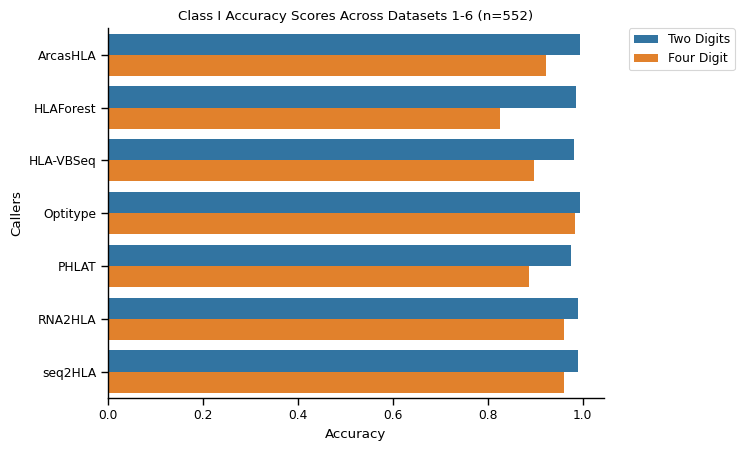

In [30]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Variable', data=df_class1)
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq', 'Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("Class I Accuracy Scores Across Datasets 1-6 (n=552)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/class1_accuracy.png',bbox_inches ="tight",dpi=300)

### Class 2

In [5]:
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.44166666666666665, 0.5106481481481482, 0.3212962962962963, 0.8481481481481481, 0.9423728813559322, 0.33535031847133756]
fourdig_list=[0.36064814814814816, 0.39305555555555555, 0.2324074074074074, 0.7583333333333333, 0.8898305084745762, 0.3573248407643312]

In [6]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df_class2=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df_class2=df_class2.melt(id_vars='Callers').rename(columns=str.title)
df_class2['Value'] = df_class2['Value'].astype(float)
df_class2['Class'] ='Class 2'

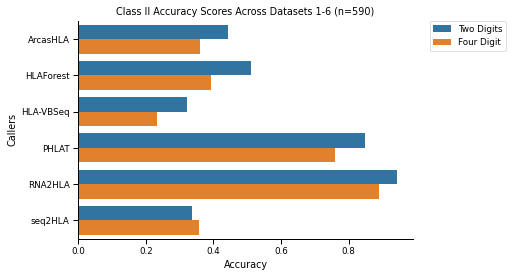

In [480]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Value',y='Callers', hue='Variable', data=df_class2)
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy")
ax.set_title("Class II Accuracy Scores Across Datasets 1-6 (n=590)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/class2_accuracy.png',bbox_inches ="tight",dpi=300)

### Grouping by Resolution

In [92]:

df_classes


,Tool,Class,Variable,Value
0,arcas,Class 1,2 Digit,99.384994
1,arcas,Class 2,2 Digit,44.166667
2,hlaforest,Class 1,2 Digit,98.462485
3,hlaforest,Class 2,2 Digit,51.064815
4,hlavbseq,Class 1,2 Digit,98.185732
5,hlavbseq,Class 2,2 Digit,32.129630
6,optitype,Class 1,2 Digit,99.446494
7,optitype,Class 2,2 Digit,NaN
8,phlat,Class 1,2 Digit,97.509225
9,phlat,Class 2,2 Digit,84.814815


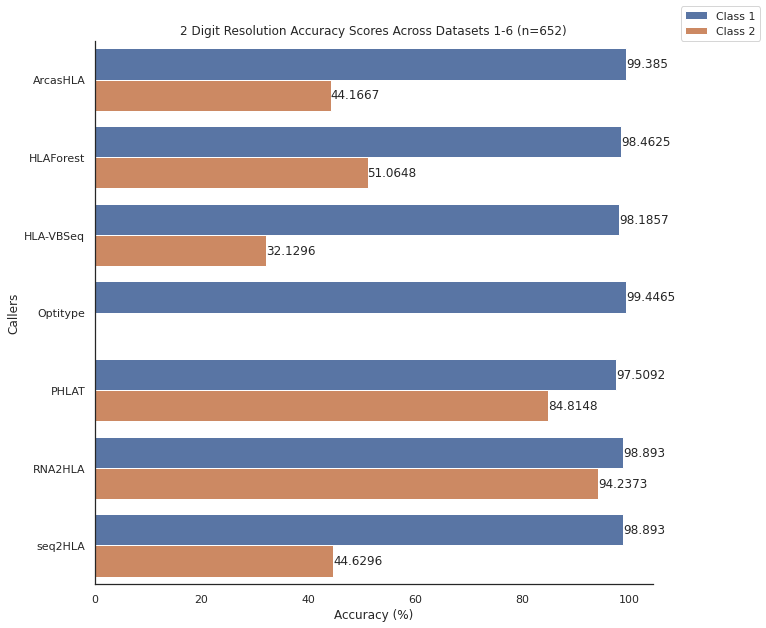

In [78]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Value',y='Tool', hue='Class', data=df_classes.loc[df_classes['Variable'] == '2 Digit'])
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy (%)")
ax.set_title("2 Digit Resolution Accuracy Scores Across Datasets 1-6 (n=652)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
plt.savefig('../Figures/2dig_accuracy.png',bbox_inches ="tight",dpi=300)

In [99]:
df_classes

,Tool,Class,Variable,Value
0,arcas,Class 1,2 Digit,99.384994
1,arcas,Class 2,2 Digit,44.166667
2,hlaforest,Class 1,2 Digit,98.462485
3,hlaforest,Class 2,2 Digit,51.064815
4,hlavbseq,Class 1,2 Digit,98.185732
5,hlavbseq,Class 2,2 Digit,32.129630
6,optitype,Class 1,2 Digit,99.446494
7,optitype,Class 2,2 Digit,NaN
8,phlat,Class 1,2 Digit,97.509225
9,phlat,Class 2,2 Digit,84.814815


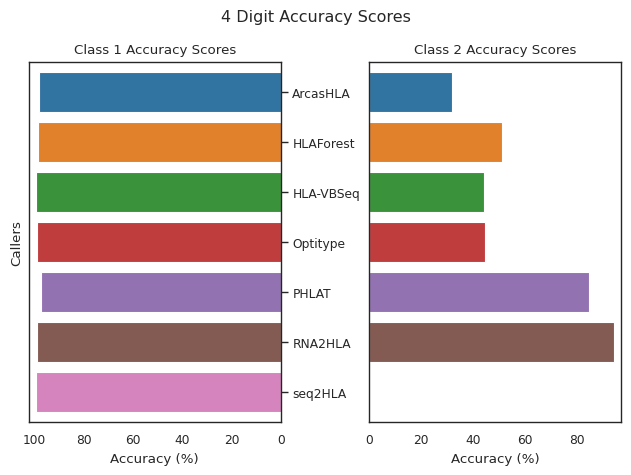

In [101]:
fig, axes = plt.subplots(ncols=2, sharey=True)
order = df_classes.groupby(["Tool"])["Value"].mean().sort_values().index
sns.set_context("paper")
sns.color_palette("pastel")
sns.set_style("white")
fig.suptitle('4 Digit Accuracy Scores')
sns.barplot(ax=axes[0],x='Value',y='Tool', data=df_classes.loc[(df_classes['Variable'] == '2 Digit') & (df_classes['Class']=='Class 1')],order=order)
#axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Class 1 Accuracy Scores')
sns.barplot(ax=axes[1],x='Value',y='Tool', data=df_classes.loc[(df_classes['Variable'] == '2 Digit') & (df_classes['Class']=='Class 2')],order=order)
#axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Class 2 Accuracy Scores')

axes[0].invert_xaxis()
axes[0].set_xlabel("Accuracy (%)")
axes[1].set_xlabel("Accuracy (%)")
axes[0].set_ylabel("Callers")
axes[1].set_ylabel("")
axes[0].set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=.35)
plt.show()

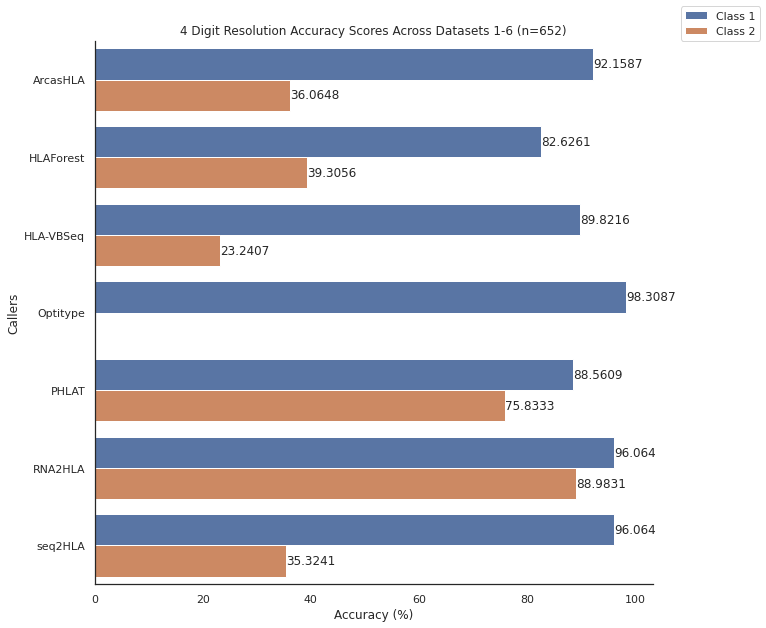

In [79]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Value',y='Tool', hue='Class', data=df_classes.loc[df_classes['Variable'] == '4 Digit'])
ax.set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Callers")
ax.set_xlabel("Accuracy (%)")
ax.set_title("4 Digit Resolution Accuracy Scores Across Datasets 1-6 (n=652)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
plt.savefig('../Figures/4dig_accuracy.png',bbox_inches ="tight",dpi=300)

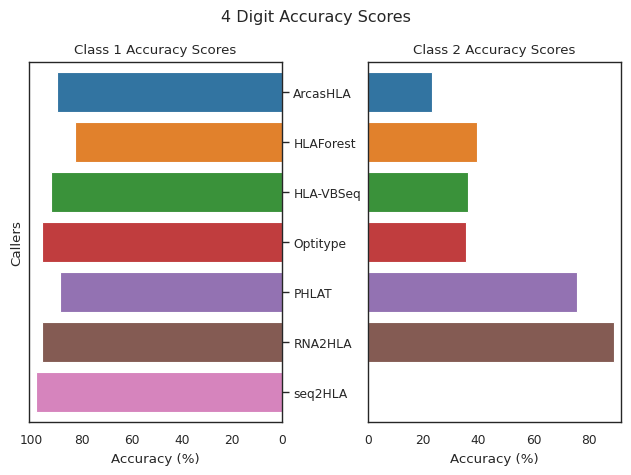

In [94]:
fig, axes = plt.subplots(ncols=2, sharey=True)
order = df_classes.groupby(["Tool"])["Value"].mean().sort_values().index
sns.set_context("paper")
sns.color_palette("pastel")
sns.set_style("white")
fig.suptitle('4 Digit Accuracy Scores')
sns.barplot(ax=axes[0],x='Value',y='Tool', data=df_classes.loc[(df_classes['Variable'] == '4 Digit') & (df_classes['Class']=='Class 1')],order=order)
#axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Class 1 Accuracy Scores')
sns.barplot(ax=axes[1],x='Value',y='Tool', data=df_classes.loc[(df_classes['Variable'] == '4 Digit') & (df_classes['Class']=='Class 2')],order=order)
#axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Class 2 Accuracy Scores')

axes[0].invert_xaxis()
axes[0].set_xlabel("Accuracy (%)")
axes[1].set_xlabel("Accuracy (%)")
axes[0].set_ylabel("Callers")
axes[1].set_ylabel("")
axes[0].set_yticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'])
#axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=.34)
plt.show()

In [ ]:
axes[0].set(yticks=['ArcasHLA', 'HLAForest','HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'], yticklabels=[])
for yloc, state in zip(y, states):
    axes[0].annotate(state, (0.5, yloc), xycoords=('figure fraction', 'data'),
                     ha='center', va='center')

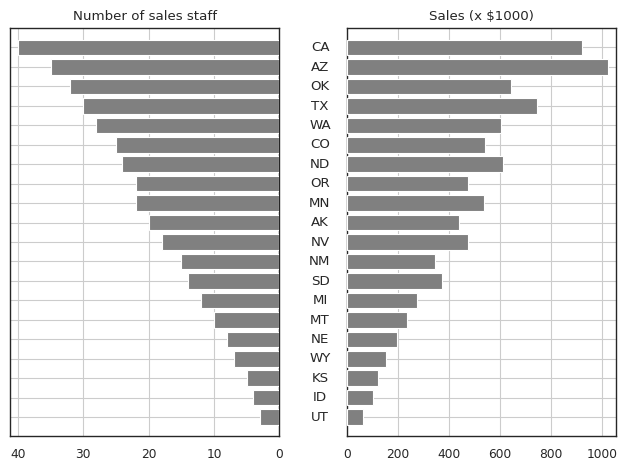

In [83]:
import numpy as np
import matplotlib.pyplot as plt
# Data
states = ["AK", "TX", "CA", "MT", "NM", "AZ", "NV", "CO", "OR", "WY", "MI",
          "MN", "UT", "ID", "KS", "NE", "SD", "WA", "ND", "OK"]
staff = np.array([20, 30, 40, 10, 15, 35, 18, 25, 22, 7, 12, 22, 3, 4, 5, 8,
                  14, 28, 24, 32])
sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[0].invert_xaxis()
#axes[0].set(yticks=y, yticklabels=states)
axes[0].set(yticks=y, yticklabels=[])
for yloc, state in zip(y, states):
    axes[0].annotate(state, (0.5, yloc), xycoords=('figure fraction', 'data'),
                     ha='center', va='center')
#axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
plt.show()


## Class 1 & 2

In [465]:
## Class 1 & 2 
caller_list=['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
twodig_list=[0.9872537659327926, 0.9834878331402086, 0.955388180764774, 0.9944649446494465, 0.9727694090382387, 0.9811703360370799, 0.9640787949015064]
fourdig_list=[0.9177288528389339, 0.8250289687137891, 0.8748551564310545, 0.9830873308733087, 0.8847045191193511, 0.9458285052143685, 0.929316338354577]

In [466]:
df_caller_list=caller_list
df_twodig_list=twodig_list
df_fourdig_list=fourdig_list
df=pd.DataFrame(np.column_stack([df_caller_list,df_twodig_list,df_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df=df.melt(id_vars='Callers').rename(columns=str.title)
df['Value'] = df['Value'].astype(float)

In [242]:
df

,Callers,Variable,Value
0,arcas,Two Digits,0.987254
1,hlaforest,Two Digits,0.983488
2,hlavbseq,Two Digits,0.955388
3,optitype,Two Digits,0.994465
4,phlat,Two Digits,0.972769
5,rna2hla,Two Digits,0.981170
6,seq2hla,Two Digits,0.964079
7,arcas,Four Digit,0.917729
8,hlaforest,Four Digit,0.825029
9,hlavbseq,Four Digit,0.874855


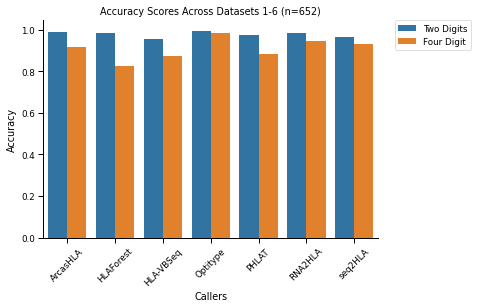

In [467]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df)
ax.set_xticklabels(['ArcasHLA', 'HLAForest','HLA-VBSeq', 'Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
#['arcas', 'hlaforest', 'hlavbseq', 'optitype', 'phlat', 'rna2hla', 'seq2hla']
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Scores Across Datasets 1-6 (n=652)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/accuracy.png',bbox_inches ="tight",dpi=300)

## D1 Accuracy Plot

In [54]:
df1=df_accuracy.loc[df_accuracy['Dataset']=='D1']
df1=df1.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df1['Value'] = df1['Value'].astype(float)
df1

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D1,300,293,205,Class 1,4 Digit,68.333333
1,hlaforest,D1,300,290,257,Class 1,4 Digit,85.666667
2,hlavbseq,D1,300,293,266,Class 1,4 Digit,88.666667
3,optitype,D1,300,292,284,Class 1,4 Digit,94.666667
4,phlat,D1,300,287,251,Class 1,4 Digit,83.666667
5,rna2hla,D1,300,293,277,Class 1,4 Digit,92.333333
6,seq2hla,D1,300,293,277,Class 1,4 Digit,92.333333
7,arcas,D1,300,293,205,Class 1,2 Digit,97.666667
8,hlaforest,D1,300,290,257,Class 1,2 Digit,96.666667
9,hlavbseq,D1,300,293,266,Class 1,2 Digit,97.666667


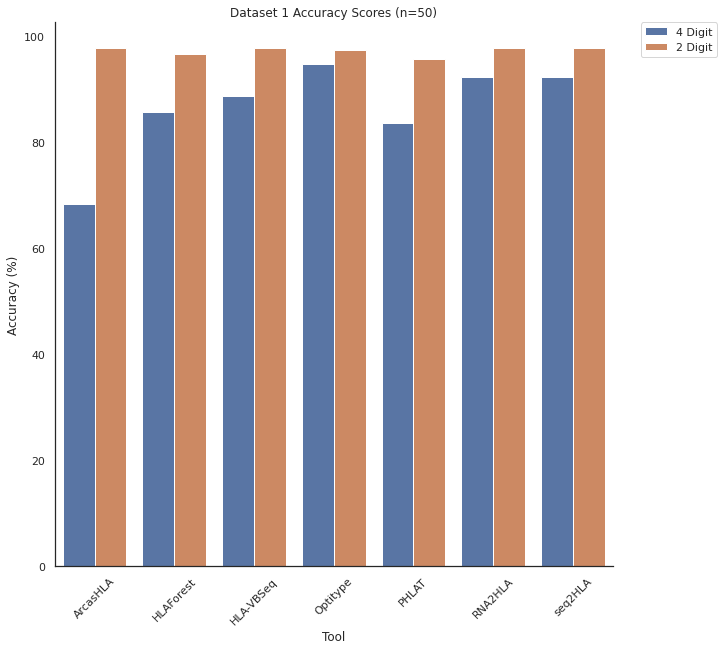

In [80]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df1, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 1 Accuracy Scores (n=50)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d1_accuracy.png',bbox_inches ="tight",dpi=300)

## D2 Accuracy Plot

In [56]:
df2=df_accuracy.loc[df_accuracy['Dataset']=='D2']
df2=df2.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df2['Value'] = df2['Value'].astype(float)
df2

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D2,2940,2927,2780,Class 1,4 Digit,94.557823
1,hlaforest,D2,2940,2900,2420,Class 1,4 Digit,82.312925
2,hlavbseq,D2,2940,2888,2643,Class 1,4 Digit,89.897959
3,optitype,D2,2940,2930,2901,Class 1,4 Digit,98.673469
4,phlat,D2,2940,2872,2617,Class 1,4 Digit,89.013605
5,rna2hla,D2,2940,2911,2838,Class 1,4 Digit,96.530612
6,seq2hla,D2,2940,2911,2838,Class 1,4 Digit,96.530612
7,arcas,D2,1960,778,608,Class 2,4 Digit,31.020408
8,hlaforest,D2,1960,910,688,Class 2,4 Digit,35.102041
9,hlavbseq,D2,1960,589,403,Class 2,4 Digit,20.561224


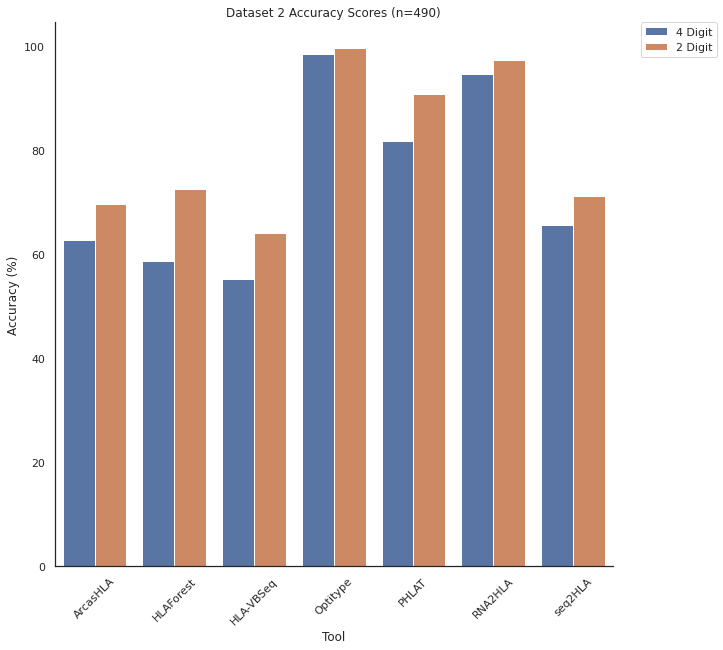

In [81]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df2, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 2 Accuracy Scores (n=490)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d2_accuracy.png',bbox_inches ="tight")

## D3 Accuracy Plot

In [59]:
df3=df_accuracy.loc[df_accuracy['Dataset']=='D3']
df3=df3.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df3['Value'] = df3['Value'].astype(float)
df3

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D3,172,172,167,Class 2,4 Digit,97.093023
1,hlaforest,D3,172,172,148,Class 2,4 Digit,86.046512
2,hlavbseq,D3,172,102,96,Class 2,4 Digit,55.813953
3,phlat,D3,172,172,160,Class 2,4 Digit,93.023256
4,rna2hla,D3,172,159,132,Class 2,4 Digit,76.744186
5,seq2hla,D3,172,100,75,Class 2,4 Digit,43.604651
6,arcas,D3,172,172,167,Class 2,2 Digit,100.000000
7,hlaforest,D3,172,172,148,Class 2,2 Digit,100.000000
8,hlavbseq,D3,172,102,96,Class 2,2 Digit,59.302326
9,phlat,D3,172,172,160,Class 2,2 Digit,100.000000


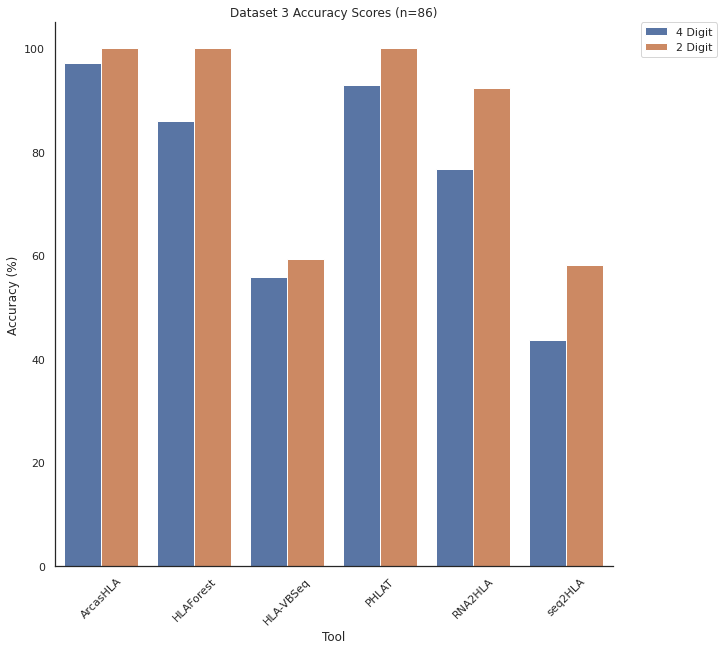

In [82]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df3, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 3 Accuracy Scores (n=86)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d3_accuracy.png',bbox_inches ="tight")

## D4 Accuracy Plot

In [61]:
df4=df_accuracy.loc[df_accuracy['Dataset']=='D4']
df4=df4.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df4['Value'] = df4['Value'].astype(float)
df4

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D4,28,4,4,Class 2,4 Digit,14.285714
1,hlaforest,D4,28,21,13,Class 2,4 Digit,46.428571
2,hlavbseq,D4,28,3,3,Class 2,4 Digit,10.714286
3,phlat,D4,28,15,14,Class 2,4 Digit,50.000000
4,rna2hla,D4,28,12,9,Class 2,4 Digit,32.142857
5,seq2hla,D4,28,12,9,Class 2,4 Digit,32.142857
6,arcas,D4,28,4,4,Class 2,2 Digit,14.285714
7,hlaforest,D4,28,21,13,Class 2,2 Digit,75.000000
8,hlavbseq,D4,28,3,3,Class 2,2 Digit,10.714286
9,phlat,D4,28,15,14,Class 2,2 Digit,53.571429


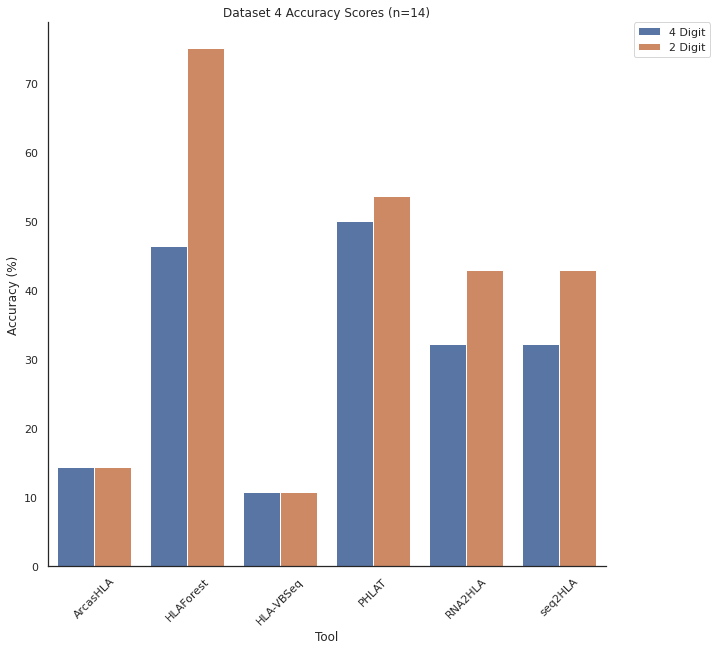

In [83]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df4, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 4 Accuracy Scores (n=14)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d4_accuracy.png',bbox_inches ="tight")

## D5 Accuracy Plot

In [63]:
df5=df_accuracy.loc[df_accuracy['Dataset']=='D5']
df5=df5.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df5['Value'] = df5['Value'].astype(float)
df5

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D5,4,4,4,Class 1,4 Digit,100.0
1,hlaforest,D5,4,4,2,Class 1,4 Digit,50.0
2,hlavbseq,D5,4,4,4,Class 1,4 Digit,100.0
3,optitype,D5,4,4,4,Class 1,4 Digit,100.0
4,phlat,D5,4,4,4,Class 1,4 Digit,100.0
5,rna2hla,D5,4,4,3,Class 1,4 Digit,75.0
6,seq2hla,D5,4,4,3,Class 1,4 Digit,75.0
7,arcas,D5,4,4,4,Class 1,2 Digit,100.0
8,hlaforest,D5,4,4,2,Class 1,2 Digit,100.0
9,hlavbseq,D5,4,4,4,Class 1,2 Digit,100.0


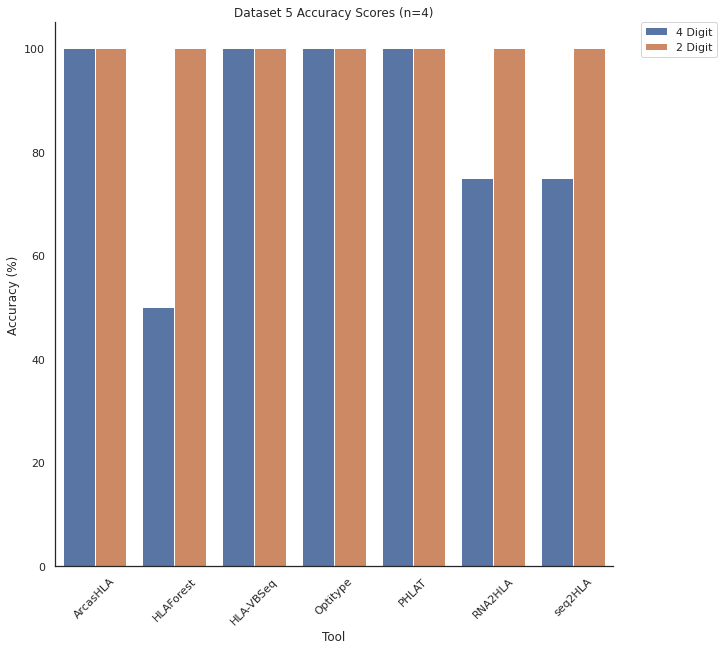

In [86]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df5, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 5 Accuracy Scores (n=4)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d5_accuracy.png',bbox_inches ="tight")

## D6 Accuracy Plot

In [65]:
df6=df_accuracy.loc[df_accuracy['Dataset']=='D6']
df6=df6.melt(id_vars=['Tool','Dataset','Num Samples','Two Digit Hits','Four Digit Hits','Class']).rename(columns=str.title)
df6['Value'] = df6['Value'].astype(float)
df6

,Tool,Dataset,Num Samples,Two Digit Hits,Four Digit Hits,Class,Variable,Value
0,arcas,D6,8,8,8,Class 1,4 Digit,100.0
1,hlaforest,D6,8,8,8,Class 1,4 Digit,100.0
2,hlavbseq,D6,8,8,8,Class 1,4 Digit,100.0
3,optitype,D6,8,8,8,Class 1,4 Digit,100.0
4,phlat,D6,8,8,8,Class 1,4 Digit,100.0
5,rna2hla,D6,8,8,6,Class 1,4 Digit,75.0
6,seq2hla,D6,8,8,6,Class 1,4 Digit,75.0
7,arcas,D6,8,8,8,Class 1,2 Digit,100.0
8,hlaforest,D6,8,8,8,Class 1,2 Digit,100.0
9,hlavbseq,D6,8,8,8,Class 1,2 Digit,100.0


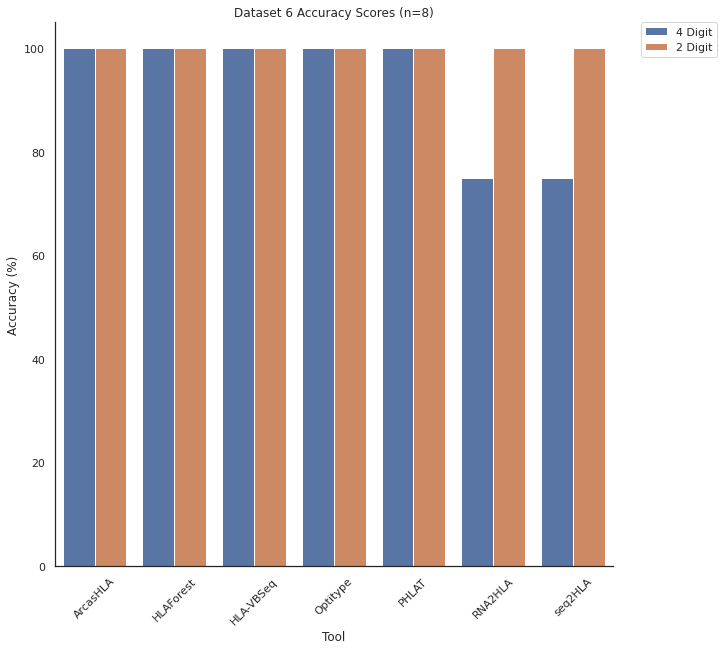

In [85]:
sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax=sns.barplot(x='Tool',y='Value', hue='Variable', data=df6, ci=None)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'HLA-VBSeq','Optitype','PHLAT','RNA2HLA','seq2HLA'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy (%)")
ax.set_title("Dataset 6 Accuracy Scores (n=8)") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d6_accuracy.png',bbox_inches ="tight")